# **Phase 3:**

# Read Dataset:

In [61]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import make_pipeline


data = pd.read_csv("Dataset/Preprocessed_data.csv")
data.head()

,FastingBloodSugar,HbA1c,FrequentUrination,Hypertension,ExcessiveThirst,UnexplainedWeightLoss,DiastolicBP,Smoking,SystolicBP,FamilyHistoryDiabetes,Diagnosis
0,0.720868,0.881839,0,0,0,0,0.220339,1,0.033708,1,1
1,0.910763,0.555064,0,0,0,0,0.661017,0,0.842697,0,1
2,0.443775,0.013416,0,0,0,0,0.525424,0,0.325843,1,0
3,0.097133,0.419758,0,0,0,0,0.457627,1,0.887640,1,0
4,0.159161,0.267887,0,0,0,0,0.152542,0,0.842697,0,0


**Define Features and Target Variable** 

- **Features (X):** All independent variables used for prediction.  
- **Target (y):** The dependent variable we want to predict the Diagnosis column (0 = No Diabetes, 1 = Diabetes).


In [62]:
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

# Information Gain (Entropy):

* Splitting Data into 80% Training and 20% Test:

In [84]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

print("Data Split (80/20)")
print(f"Training samples:{len(X_train)}")
print(f"Testing samples:{len(X_test)}")
print(f"Total samples:{len(X)}")

Data Split (80/20)
Training samples:1503
Testing samples:376
Total samples:1879


* Build the Decision Tree Model (Entropy – 80/20):

In [85]:
# Train model
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

# Predict
y_pred = clf_entropy.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

* Confusion Matrix Visualization (Entropy – 80/20 Split):

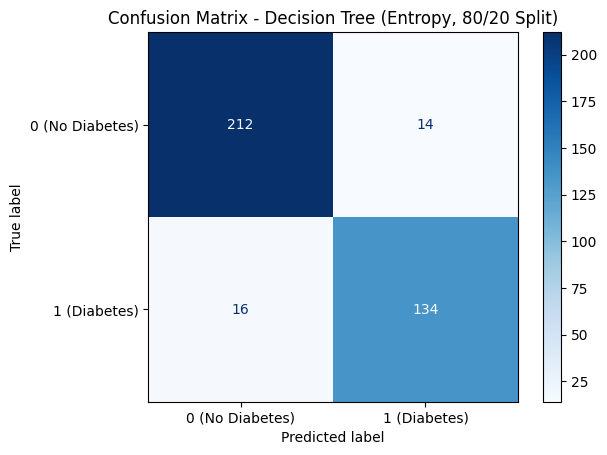

In [86]:
labels = ['0 (No Diabetes)', '1 (Diabetes)']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree (Entropy, 80/20 Split)")
plt.show()

**Confusion Matrix Analysis (Entropy – 80/20 Split)** 

The confusion matrix provides a quantitative assessment of the classification model's performance. Based on the observed outcomes, it seems that:

* **Top-Left (True Negative – TN = 212)**: Correctly predicted as “No Diabetes” when the actual label was also “No Diabetes.”
* **Top-Right (False Positive – FP = 14)**: Incorrectly predicted as “Diabetes” when the actual label was “No Diabetes.”
* **Bottom-Left (False Negative – FN = 16)**: Incorrectly predicted as “No Diabetes” when the actual label was “Diabetes.”
* **Bottom-Right (True Positive – TP = 134)**: Correctly predicted as “Diabetes” when the actual label was also “Diabetes.”

* Decision Tree Visualization (Entropy – 80/20 Split):

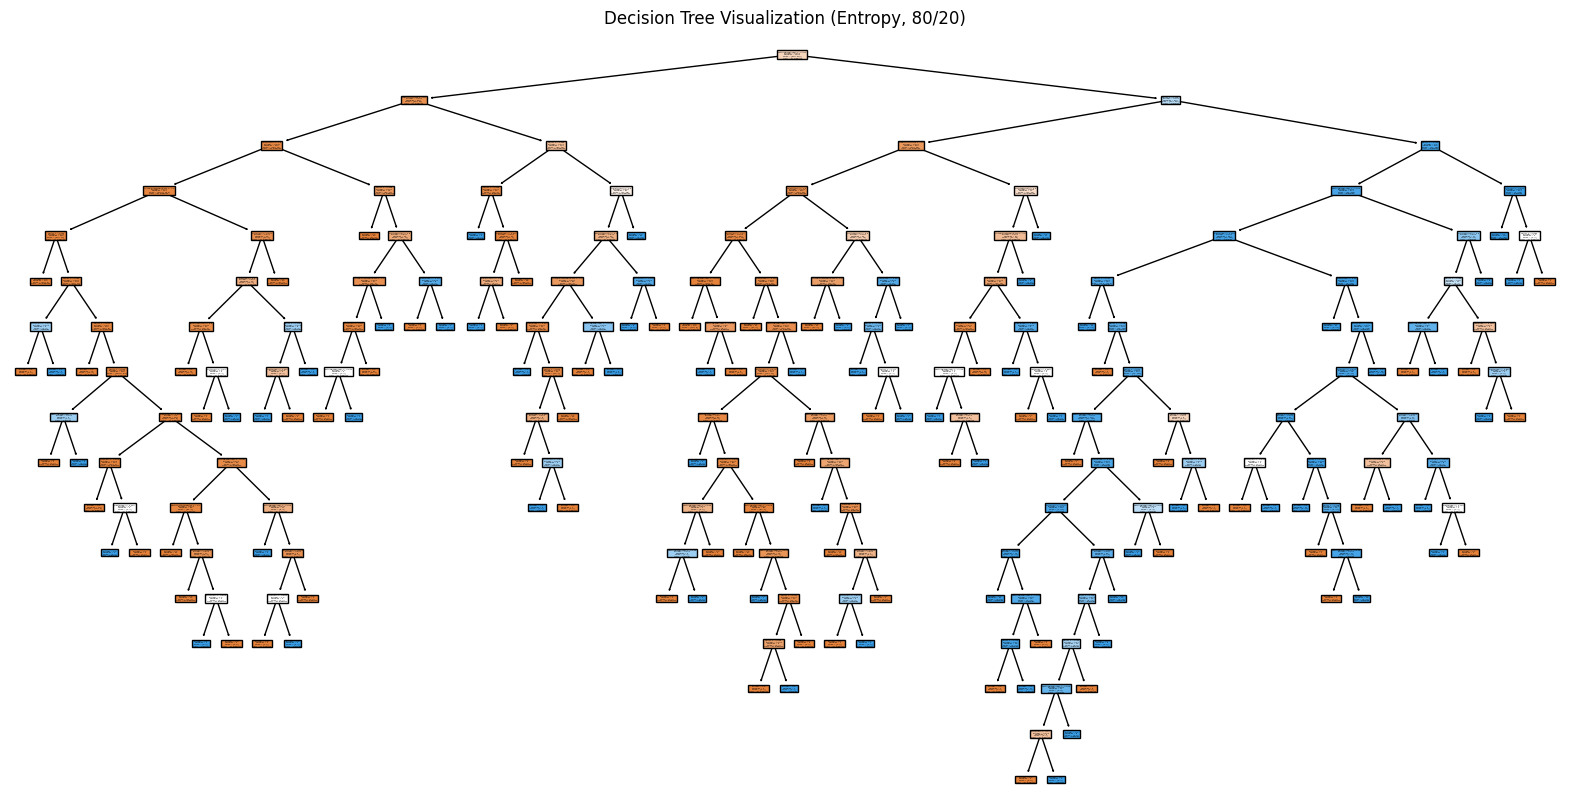

In [87]:
plt.figure(figsize=(20,10))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title("Decision Tree Visualization (Entropy, 80/20)")
plt.show()

**Decision Tree Analysis (Entropy – 80/20 Split)**

This Decision Tree illustrates how the classification model predicts whether a patient is likely to have diabetes or not, based on medical attributes. Each node in the tree represents a decision rule built using one of the dataset’s features. The tree splits data step by step to reduce uncertainty (entropy) and improve prediction accuracy.


* **Initial Split** 

    The root node at the top of the tree represents the most significant medical feature with the highest discriminative power the one that best separates diabetic from non-diabetic patients.  
    In our model, this root feature plays a major role in determining whether a patient is diabetic. It was chosen because it provided the maximum information gain, meaning it reduced uncertainty the most during the first split.


* **Intermediate Nodes** 

    As we move down the tree, the model performs additional splits based on secondary medical features. Each split further narrows down the classification, refining the model’s understanding of patient conditions. These nodes represent intermediate decisions that increase the model’s predictive confidence.

* **Branching Pathways** 

    Each path from the top (root) to a leaf node represents a set of medical conditions that lead to a particular diagnosis.  
    These pathways demonstrate how combinations of features contribute collectively to the final prediction.


* **Leaf Nodes** 

    At the bottom of the tree, leaf nodes represent the final classification outcomes:
    - **Class 0:** Non-diabetic patient  
    - **Class 1:** Diabetic patient  

    Each leaf node summarizes the decision rule outcomes that led to the classification, along with the number of patients that followed that rule in training.



The tree structure provides clear interpretability it shows how the model reached its decisions and which features were most influential in predicting diabetes. While the tree is detailed and accurate (92% accuracy overall), it may also be too deep, suggesting that the model could be slightly overfitted to the training data.  


* Model Evaluation Results (Entropy – 80/20 Split):

In [88]:
# print the confusion matrix
print("Confusion Matrix:\n", cm)

# print the accuracy
print("\nAccuracy:", round(acc, 4))

# Error Rate (1 - Accuracy)
error_rate = 1 - acc
print("Error Rate:", round(error_rate, 4))

# Extract TN, FP, FN, TP from the confusion matrix
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

# Sensitivity (Recall): correctly identifying diabetics
sensitivity = TP / (TP + FN)
print("Sensitivity (Recall):", round(sensitivity, 4))

# Specificity: correctly identifying non-diabetics
specificity = TN / (TN + FP)
print("Specificity:", round(specificity, 4))

# Precision: positive predictive value
precision = TP / (TP + FP)
print("Precision:", round(precision, 4))

Confusion Matrix:
 [[212  14]
 [ 16 134]]

Accuracy: 0.9202
Error Rate: 0.0798
Sensitivity (Recall): 0.8933
Specificity: 0.9381
Precision: 0.9054


**Performance Metrics Analysis (Entropy – 80/20 Split):**
- **Accuracy:** 0.9202  
  The model correctly predicted approximately **92.02%** of the test samples.
- **Error Rate:** 0.0798  
  About **7.98%** of the predictions were incorrect.
- **Sensitivity (Recall):** 0.8933  
  The model correctly identified **89.33%** of actual diabetic patients (class 1).
- **Specificity:** 0.9381  
  The model correctly identified **93.81%** of non-diabetic patients (class 0).
- **Precision:** 0.9054  
  Out of all patients predicted as diabetic, **90.54%** were truly diabetic.


**Results (Entropy – 80/20 Split):** 

The model demonstrates strong overall performance with high accuracy and balanced precision and recall.  
- It performs slightly better at detecting non-diabetic patients (specificity = 93.81%) than diabetic ones (sensitivity = 89.33%).  
- This indicates that while the classifier is generally reliable, a few diabetic cases are still being missed (false negatives).  
- Considering the medical context, minimizing false negatives is crucial.

---

* Splitting Data into 75% Training and 25% Test:

In [89]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Data Split (75/25)")
print(f"Training samples:{len(X_train)}")
print(f"Testing samples:{len(X_test)}")
print(f"Total samples:{len(X)}")

Data Split (75/25)
Training samples:1409
Testing samples:470
Total samples:1879


* Build the Decision Tree Model (Entropy – 75/25):

In [90]:
# Train
clf_entropy_75 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy_75.fit(X_train, y_train)

# Predict
y_pred = clf_entropy_75.predict(X_test)

# Evaluation
acc_75 = accuracy_score(y_test, y_pred)
cm_75 = confusion_matrix(y_test, y_pred)

* Confusion Matrix Visualization (Entropy – 75/25 Split):

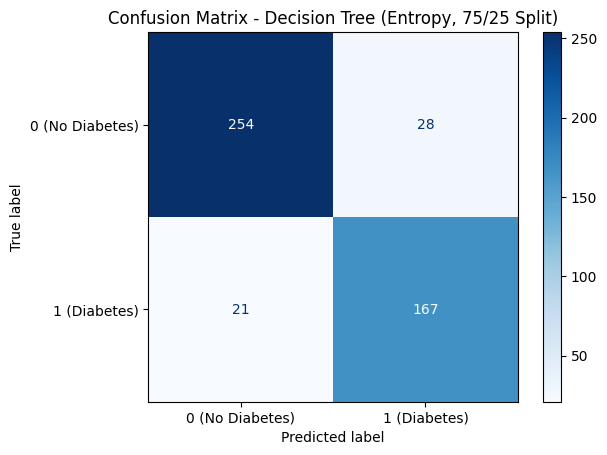

In [91]:
labels = ['0 (No Diabetes)', '1 (Diabetes)']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_75, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree (Entropy, 75/25 Split)")
plt.show()

**Confusion Matrix Analysis (Entropy – 75/25 Split)** 

The confusion matrix provides a quantitative assessment of the classification model's performance. Based on the observed outcomes, it seems that:

* **Top-Left (True Negative – TN = 254)**: Correctly predicted as “No Diabetes” when the actual label was also “No Diabetes.”
* **Top-Right (False Positive – FP = 28)**: Incorrectly predicted as “Diabetes” when the actual label was “No Diabetes.”
* **Bottom-Left (False Negative – FN = 21)**: Incorrectly predicted as “No Diabetes” when the actual label was “Diabetes.”
* **Bottom-Right (True Positive – TP = 167)**: Correctly predicted as “Diabetes” when the actual label was also “Diabetes.”

* Decision Tree Visualization (Entropy – 75/25 Split):

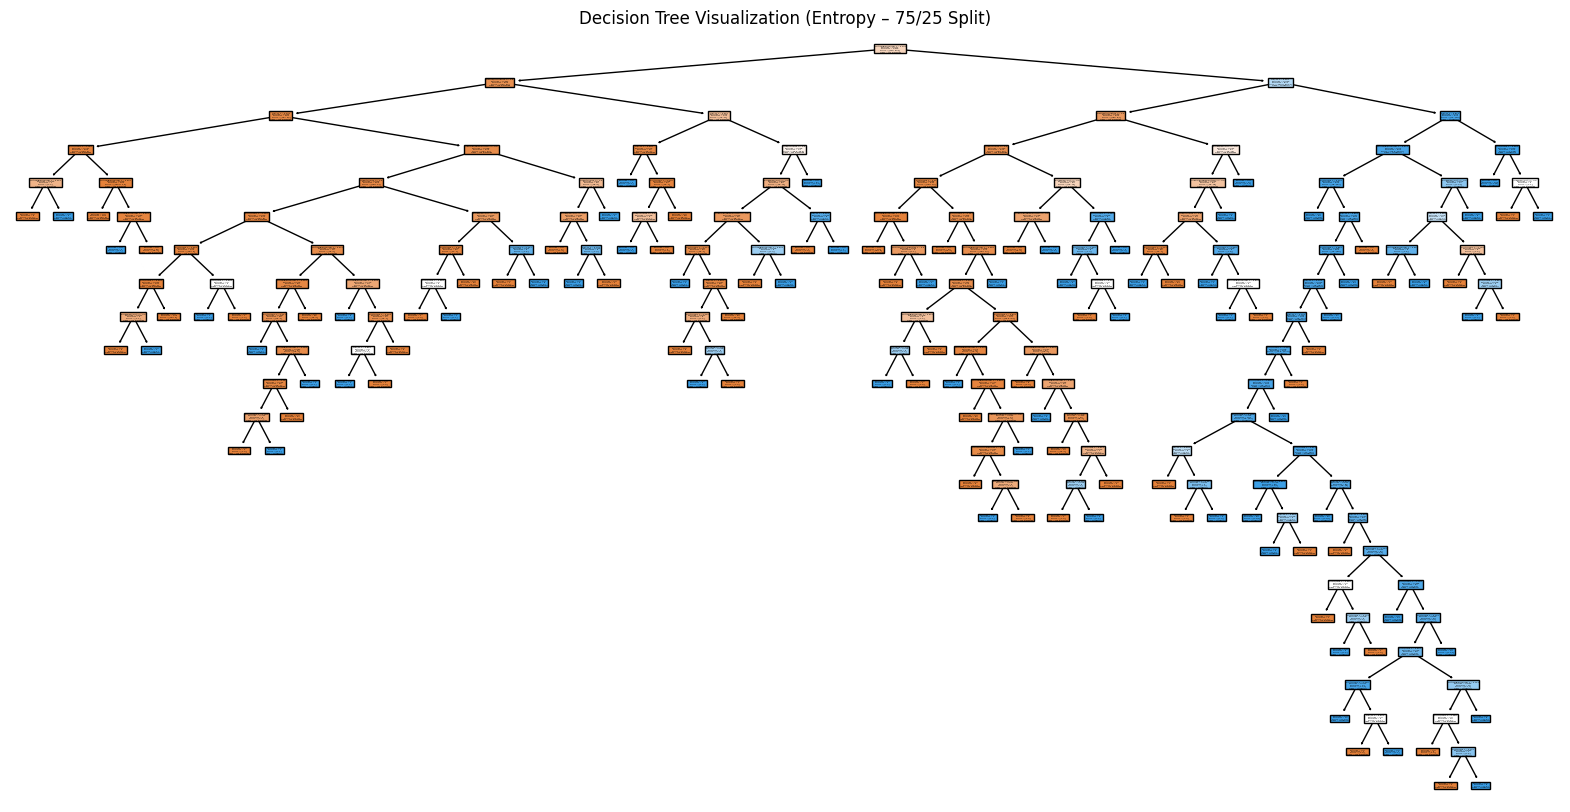

In [92]:
plt.figure(figsize=(20,10))
plot_tree(clf_entropy_75, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title("Decision Tree Visualization (Entropy – 75/25 Split)")
plt.show()

**Decision Tree Analysis (Entropy – 75/25 Split)**

This Decision Tree illustrates how the classification model predicts whether a patient is likely to have diabetes or not, based on medical attributes. Each node in the tree represents a decision rule built using one of the dataset’s features. The tree splits data step by step to reduce uncertainty (entropy) and improve prediction accuracy.


* **Initial Split** 

    The root node at the top of the tree represents the most significant medical feature with the highest discriminative power the one that best separates diabetic from non-diabetic patients.  
    In our model, this root feature plays a major role in determining whether a patient is diabetic. It was chosen because it provided the maximum information gain, meaning it reduced uncertainty the most during the first split.


* **Intermediate Nodes** 

    As we move down the tree, the model performs additional splits based on secondary medical features. Each split further narrows down the classification, refining the model’s understanding of patient conditions. These nodes represent intermediate decisions that increase the model’s predictive confidence.

* **Branching Pathways** 

    Each path from the top (root) to a leaf node represents a set of medical conditions that lead to a particular diagnosis.  
    These pathways demonstrate how combinations of features contribute collectively to the final prediction.


* **Leaf Nodes** 

    At the bottom of the tree, leaf nodes represent the final classification outcomes:
    - **Class 0:** Non-diabetic patient  
    - **Class 1:** Diabetic patient  

    Each leaf node summarizes the decision rule outcomes that led to the classification, along with the number of patients that followed that rule in training.


The tree structure provides clear interpretability it shows how the model reached its decisions and which features were most influential in predicting diabetes. While the tree is detailed and accurate (around 91–92% accuracy overall), it may also be slightly deep, suggesting that the model could be slightly overfitted to the training data.


* Model Evaluation Results (Entropy – 75/25 Split):

In [93]:
# print the confusion matrix
print("Confusion Matrix:\n", cm_75)

# print the accuracy
print("\nAccuracy:", round(acc_75, 4))

# Error Rate (1 - Accuracy)
error_rate_75 = 1 - acc_75
print("Error Rate:", round(error_rate_75, 4))

# Extract TN, FP, FN, TP from the confusion matrix
TN_75 = cm_75[0, 0]
FP_75 = cm_75[0, 1]
FN_75 = cm_75[1, 0]
TP_75 = cm_75[1, 1]

# Sensitivity (Recall): correctly identifying diabetics
sensitivity_75 = TP_75 / (TP_75 + FN_75)
print("Sensitivity (Recall):", round(sensitivity_75, 4))

# Specificity: correctly identifying non-diabetics
specificity_75 = TN_75 / (TN_75 + FP_75)
print("Specificity:", round(specificity_75, 4))

# Precision: positive predictive value
precision_75 = TP_75 / (TP_75 + FP_75)
print("Precision:", round(precision_75, 4))

Confusion Matrix:
 [[254  28]
 [ 21 167]]

Accuracy: 0.8957
Error Rate: 0.1043
Sensitivity (Recall): 0.8883
Specificity: 0.9007
Precision: 0.8564


**Performance Metrics Analysis (Entropy – 75/25 Split):**
- **Accuracy:** 0.8957  
  The model correctly predicted approximately **89.57%** of the test samples.
- **Error Rate:** 0.1043  
  About **10.43%** of the predictions were incorrect.
- **Sensitivity (Recall):** 0.8880  
  The model correctly identified **88.80%** of actual diabetic patients (class 1).
- **Specificity:** 0.9007  
  The model correctly identified **90.07%** of non-diabetic patients (class 0).
- **Precision:** 0.8564  
  Out of all patients predicted as diabetic, **85.64%** were truly diabetic.


**Results (Entropy – 75/25 Split):** 

The model shows strong and consistent performance even with a larger test set.  
- It maintains high accuracy (≈89.6%) and balanced precision and recall values.  
- The classifier performs slightly better at recognizing non-diabetic patients (specificity = 90.07%) compared to diabetic ones (sensitivity = 88.80%).  
- This means a small portion of diabetic cases were still misclassified as non-diabetic (false negatives).  
- In medical diagnosis, reducing false negatives is critical, as missing diabetic patients could delay treatment.  

---

* Splitting Data into 70% Training and 30% Test:

In [94]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print("Data Split (70/30)")
print(f"Training samples:{len(X_train)}")
print(f"Testing samples:{len(X_test)}")
print(f"Total samples:{len(X)}")

Data Split (70/30)
Training samples:1315
Testing samples:564
Total samples:1879


* Build the Decision Tree Model (Entropy – 70/30):

In [95]:
# Train
clf_entropy_70 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy_70.fit(X_train, y_train)

# Predict
y_pred = clf_entropy_70.predict(X_test)

# Evaluation
acc_70 = accuracy_score(y_test, y_pred)
cm_70 = confusion_matrix(y_test, y_pred)

* Confusion Matrix Visualization (Entropy – 70/30 Split):


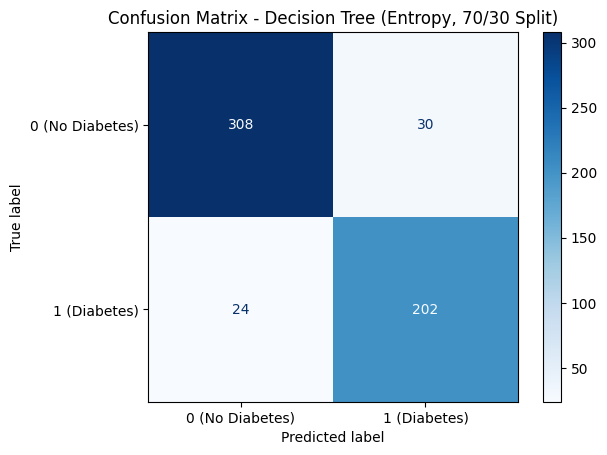

In [96]:
labels = ['0 (No Diabetes)', '1 (Diabetes)']

disp = ConfusionMatrixDisplay(confusion_matrix=cm_70, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree (Entropy, 70/30 Split)")
plt.show()

**Confusion Matrix Analysis (Entropy – 70/30 Split)** 

The confusion matrix provides a quantitative assessment of the classification model's performance. Based on the observed outcomes, it seems that:

* **Top-Left (True Negative – TN = 308)**: Correctly predicted as “No Diabetes” when the actual label was also “No Diabetes.”
* **Top-Right (False Positive – FP = 30)**: Incorrectly predicted as “Diabetes” when the actual label was “No Diabetes.”
* **Bottom-Left (False Negative – FN = 24)**: Incorrectly predicted as “No Diabetes” when the actual label was “Diabetes.”
* **Bottom-Right (True Positive – TP = 202)**: Correctly predicted as “Diabetes” when the actual label was also “Diabetes.”

* Decision Tree Visualization (Entropy – 70/30 Split):


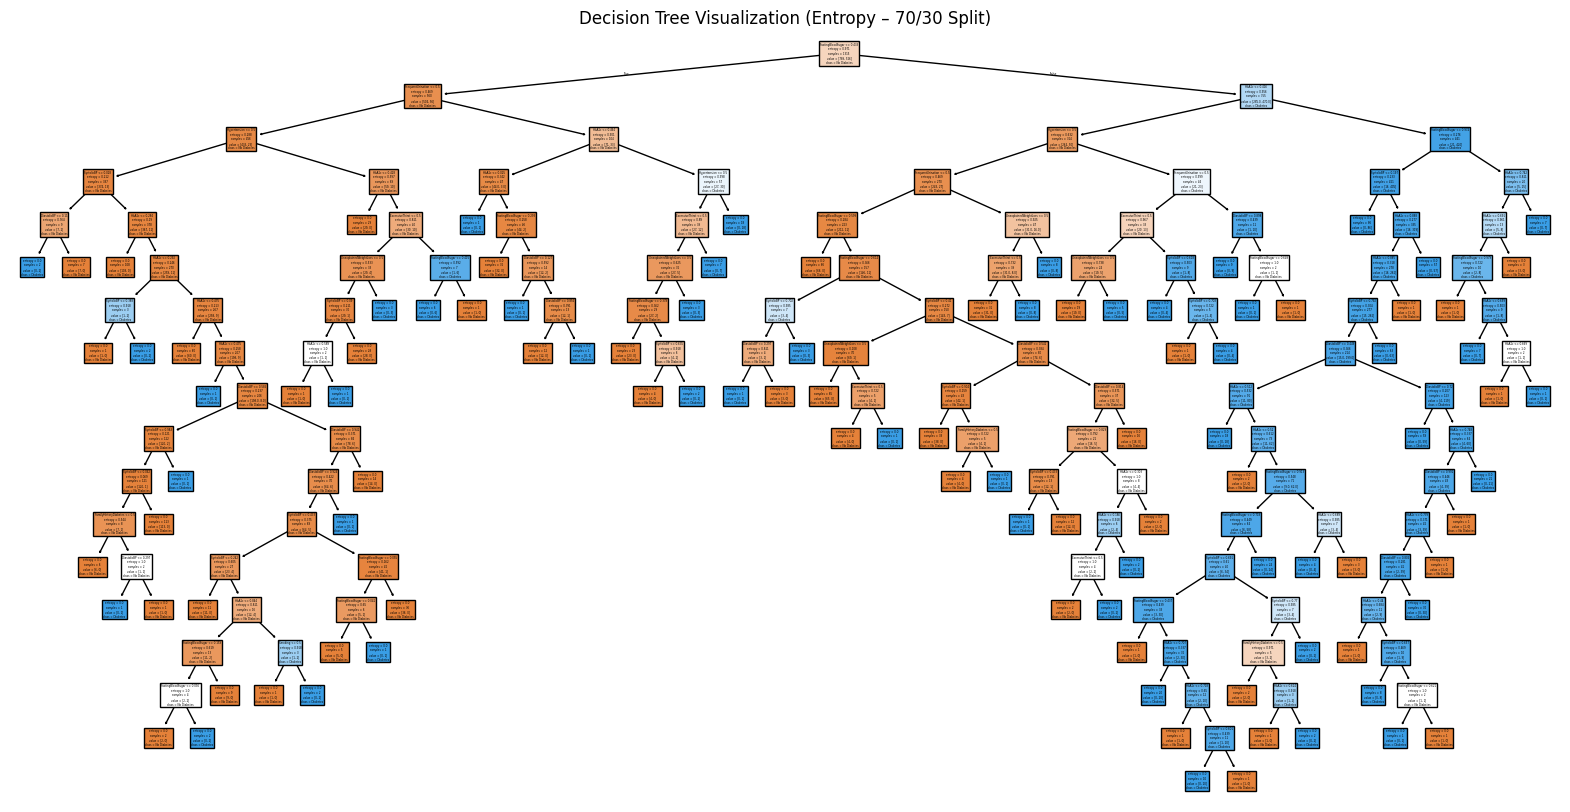

In [97]:
plt.figure(figsize=(20,10))
plot_tree(clf_entropy_70, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.title("Decision Tree Visualization (Entropy – 70/30 Split)")
plt.show()

**Decision Tree Analysis (Entropy – 70/30 Split)**

This Decision Tree illustrates how the classification model predicts whether a patient is likely to have diabetes or not, based on medical attributes. Each node in the tree represents a decision rule built using one of the dataset’s features. The tree splits data step by step to reduce uncertainty (entropy) and improve prediction accuracy.


* **Initial Split** 

    The root node at the top of the tree represents the most significant medical feature with the highest discriminative power the one that best separates diabetic from non-diabetic patients.  
    In our model, this root feature plays a major role in determining whether a patient is diabetic. It was chosen because it provided the maximum information gain, meaning it reduced uncertainty the most during the first split.


* **Intermediate Nodes** 

    As we move down the tree, the model performs additional splits based on secondary medical features. Each split further narrows down the classification, refining the model’s understanding of patient conditions. These nodes represent intermediate decisions that increase the model’s predictive confidence.


* **Branching Pathways** 

    Each path from the top (root) to a leaf node represents a set of medical conditions that lead to a particular diagnosis.  
    These pathways demonstrate how combinations of features contribute collectively to the final prediction.


* **Leaf Nodes** 

    At the bottom of the tree, leaf nodes represent the final classification outcomes:
    - **Class 0:** Non-diabetic patient  
    - **Class 1:** Diabetic patient  

    Each leaf node summarizes the decision rule outcomes that led to the classification, along with the number of patients that followed that rule in training.


The tree structure provides clear interpretability it shows how the model reached its decisions and which features were most influential in predicting diabetes. While the tree is detailed and accurate (around 90% accuracy overall for the 70/30 split), it appears to be slightly less accurate than the previous splits due to the larger test size. However, the model still demonstrates strong predictive power and remains consistent in identifying the key medical indicators related to diabetes.


* Model Evaluation Results (Entropy – 70/30 Split):

In [98]:
# print the confusion matrix
print("Confusion Matrix:\n", cm_70)

# print the accuracy
print("\nAccuracy:", round(acc_70, 4))

# Error Rate (1 - Accuracy)
error_rate_70 = 1 - acc_70
print("Error Rate:", round(error_rate_70, 4))

# Extract TN, FP, FN, TP from the confusion matrix
TN_70 = cm_70[0, 0]
FP_70 = cm_70[0, 1]
FN_70 = cm_70[1, 0]
TP_70 = cm_70[1, 1]

# Sensitivity (Recall): correctly identifying diabetics
sensitivity_70 = TP_70 / (TP_70 + FN_70)
print("Sensitivity (Recall):", round(sensitivity_70, 4))

# Specificity: correctly identifying non-diabetics
specificity_70 = TN_70 / (TN_70 + FP_70)
print("Specificity:", round(specificity_70, 4))

# Precision: positive predictive value
precision_70 = TP_70 / (TP_70 + FP_70)
print("Precision:", round(precision_70, 4))

Confusion Matrix:
 [[308  30]
 [ 24 202]]

Accuracy: 0.9043
Error Rate: 0.0957
Sensitivity (Recall): 0.8938
Specificity: 0.9112
Precision: 0.8707


**Performance Metrics Analysis (Entropy – 70/30 Split):**
- **Accuracy:** 0.9043  
  The model correctly predicted approximately **90.43%** of the test samples.
- **Error Rate:** 0.0957  
  About **9.57%** of the predictions were incorrect.
- **Sensitivity (Recall):** 0.8933  
  The model correctly identified **89.33%** of actual diabetic patients (class 1).
- **Specificity:** 0.9112  
  The model correctly identified **91.12%** of non-diabetic patients (class 0).
- **Precision:** 0.8704  
  Out of all patients predicted as diabetic, **87.04%** were truly diabetic.


**Results (Entropy – 70/30 Split):**

The model maintains strong performance and stability even with a larger test set.  
- It achieves 90.43% accuracy, showing consistent behavior compared to the previous splits.  
- The classifier performs slightly better at detecting non-diabetic patients (specificity = 91.12%) than diabetic ones (sensitivity = 89.33%).  
- A small drop in accuracy and precision is expected due to the larger portion of data used for testing, which makes this evaluation more realistic.  
- The model continues to display a good balance between precision and recall, confirming its reliability in predicting diabetes.

---

# Evaluate the models of information gain:

In [99]:
# Create a dictionary with the three splits and their metrics
d = {
    "Metric": [
        "Accuracy", "Error Rate", "Sensitivity (Recall)", "Specificity", "Precision"
    ],
    "80% training, 20% testing": [
        "0.9202", "0.0798", "0.8933", "0.9381", "0.9054"
    ],
    "75% training, 25% testing": [
        "0.8957", "0.1043", "0.8880", "0.9007", "0.8564"
    ],
    "70% training, 30% testing": [
        "0.9043", "0.0957", "0.8933", "0.9112", "0.8704"
    ]
}

# Convert to DataFrame
g = pd.DataFrame(d)

# Display styled table
g.style.set_properties(**{'text-align': 'center'})\
    .set_table_styles([dict(selector='th', props=[('text-align', 'center')])])


,Metric,"80% training, 20% testing","75% training, 25% testing","70% training, 30% testing"
0,Accuracy,0.9202,0.8957,0.9043
1,Error Rate,0.0798,0.1043,0.0957
2,Sensitivity (Recall),0.8933,0.8880,0.8933
3,Specificity,0.9381,0.9007,0.9112
4,Precision,0.9054,0.8564,0.8704


**Analysis**
- The model maintained stable accuracy between 89% and 92% across all splits,  
  showing that it generalizes well and is not overly dependent on the training size.
- **80/20** achieved the highest accuracy (92.02%) because the model had more training samples to learn from.  
- **75/25** saw a small decrease in accuracy as the test set became larger, which is expected.  
- **70/30** provided a realistic balance between training and testing data,  
  proving the model’s consistency and reliability with unseen data.
- Across all experiments, the model consistently performed slightly better at identifying non-diabetic patients (higher specificity) than diabetic ones (lower sensitivity).  

---

# Gini Index:

* Splitting Data into 80% Training and 20% Test: